In [1]:
using BSON: @save, @load
using Statistics
using DelimitedFiles
using Printf
using MDToolbox
using StatsBase 
using LinearAlgebra
using Random
using Plots

include("../src/afm.jl")

baumwelch (generic function with 1 method)

In [2]:
nq = 576
test_radius = 25
pred_radii = [15, 18, 20, 25, 30, 32, 35]
sigma_noise = 3
sharpness = 10
nframe = 100

plts = []
x_min = 0
x_max = 70
bin_length = 30
font_size = 10
width = (x_max - x_min) / bin_length

for pred_radius in pred_radii
    @load "data/viterbi/test_radius_$(test_radius)/pred_radius_$(pred_radius)/sharpness_$(sharpness)/q_$(nq)/rmsds_origin.bson" rmsds_arr
    histogram(reshape(rmsds_arr, nframe * nq, 1), bins=range(x_min, stop = x_max, length = bin_length), bar_width = width, tickfontsize = font_size, label = "individual", legend = false)
    @load "data/viterbi/test_radius_$(test_radius)/pred_radius_$(pred_radius)/sharpness_$(sharpness)/q_$(nq)/rmsds_MD.bson" rmsds_arr
    p = histogram!(reshape(rmsds_arr, nframe * nq, 1), bins=range(x_min, stop = x_max, length = bin_length), bar_width = 0.65 * width, tickfontsize = font_size, label = "trajectory with T", legend = false)
    push!(plts, p)
end

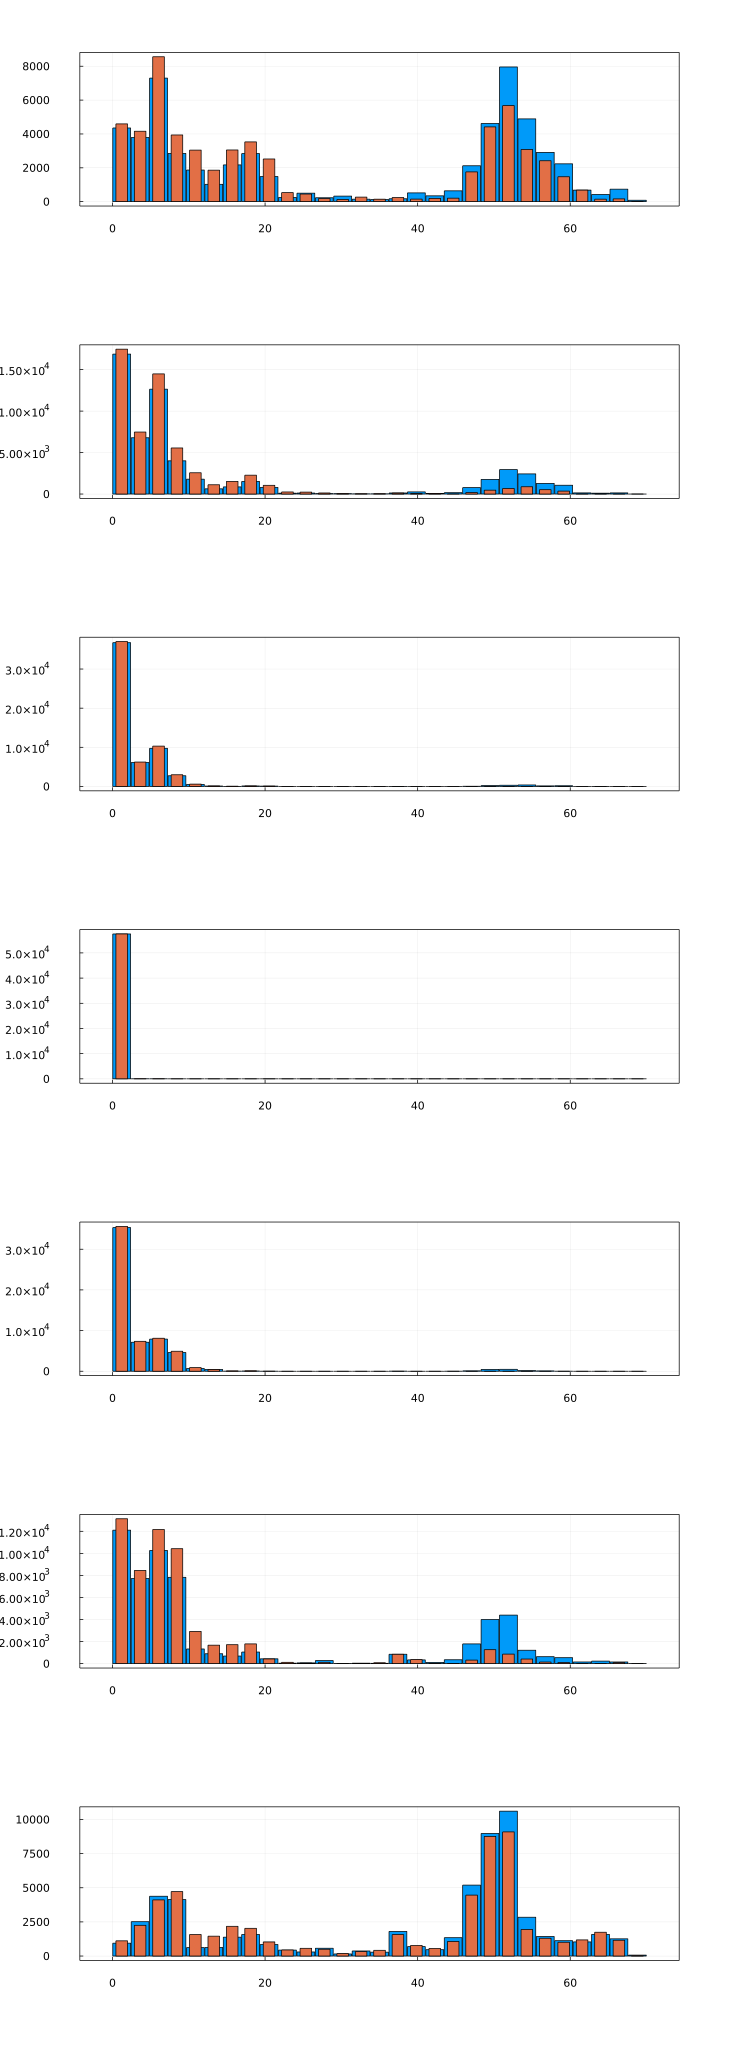

In [3]:
plot(plts..., layout=(size(pred_radii, 1),1),size=(1000,size(pred_radii, 1) * 400), margin=16Plots.mm, framestyle=:box)
# savefig("data/rmse_individual_original.png")